# NDBC Station 41047 Spectral Wave Density Data

This notebook explores the differences between spectral wave density data products for [NDBC Station 41047](http://www.ndbc.noaa.gov/station_page.php?station=41047). It investigates three unique OPeNDAP sources for the data: [Planet OS](http://data.planetos.com/datasets/noaa_ndbc_swden_stations), [NDBC realtime](http://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/41047/41047w9999.nc.html), and [NDBC 2014 historical](http://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/41047/41047w2014.nc.html) products.

Planet OS currently acquires spectral wave density data from each individual station's realtime product, which is denoted by the `w9999` nomenclature immediately before the file extension. We would expect the Planet OS product and the NDBC realtime product to be identical.

Let's begin with the required imports...

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

Next we'll setup our data sources and acquire the data via OPeNDAP using `xarray`.

In [2]:
# OpenDAP URLs for each product
ndbc_rt_url='http://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/41047/41047w9999.nc'
ndbc_2014_url = 'http://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/41047/41047w2014.nc'
planetos_tds_url = 'http://thredds.planetos.com/thredds/dodsC/dpipe//rel_0_8x03_dataset/transform/ns=/noaa_ndbc_swden_stations/scheme=/http/authority=/dods.ndbc.noaa.gov/path=/thredds/dodsC/data/swden/41047/41047w9999.nc/chunk=/1/1/data'

# acquire OpenDAP datasets
ds_ndbc_rt = xr.open_dataset(ndbc_rt_url)
ds_ndbc_2014 = xr.open_dataset(ndbc_2014_url)
ds_planetos = xr.open_dataset(planetos_tds_url)

In [3]:
# Let's focus on a specific hour of interest...
time = '2014-08-09 00:00:00'

# Select the specific hour for each dataset
ds_ndbc_rt_hour = ds_ndbc_rt.sel(time=time).isel(latitude=0, longitude=0)
ds_ndbc_2014_hour = ds_ndbc_2014.sel(time=time).isel(latitude=0, longitude=0)
ds_planetos_hour = ds_planetos.sel(time=time).isel(latitude=0, longitude=0)

## Product Inspection: Planet OS / NDBC Realtime / NDBC 2014 Historical
For each of our three data products, we'll create an associated Dataframe for analysis.

In [4]:
# First, the Planet OS data which is acquired from the NDBC realtime station file.
df_planetos = ds_planetos_hour.to_dataframe().drop(['context_time_latitude_longitude_frequency','mx_dataset','mx_creator_institution'], axis=1)
df_planetos.head(8)

,time,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
frequency,,,,,,,,
0.033,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.038,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.043,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.048,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.053,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.058,2014-08-09,27.517,-71.483002,0.013,104.0,116.0,0.54,0.36
0.063,2014-08-09,27.517,-71.483002,0.065,88.0,124.0,0.43,0.22
0.068,2014-08-09,27.517,-71.483002,0.077,132.0,180.0,0.14,0.29


In [5]:
# Second, the NDBC realtime station data.
df_ndbc_rt = ds_ndbc_rt_hour.to_dataframe()
df_ndbc_rt.head(8)

,time,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
frequency,,,,,,,,
0.033,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.038,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.043,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.048,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.053,2014-08-09,27.517,-71.483002,0.000,NaN,NaN,NaN,NaN
0.058,2014-08-09,27.517,-71.483002,0.013,104.0,116.0,0.54,0.36
0.063,2014-08-09,27.517,-71.483002,0.065,88.0,124.0,0.43,0.22
0.068,2014-08-09,27.517,-71.483002,0.077,132.0,180.0,0.14,0.29


In [6]:
# Finally, the 2014 archival data.
df_ndbc_2014 = ds_ndbc_2014_hour.to_dataframe()
df_ndbc_2014.head(8)

,time,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
frequency,,,,,,,,
0.0200,2014-08-09,27.517,-71.483002,0.00,174.0,178.0,0.13,0.98
0.0325,2014-08-09,27.517,-71.483002,0.00,174.0,173.0,0.26,0.78
0.0375,2014-08-09,27.517,-71.483002,0.00,56.0,351.0,0.20,0.62
0.0425,2014-08-09,27.517,-71.483002,0.00,119.0,159.0,0.28,0.36
0.0475,2014-08-09,27.517,-71.483002,0.00,72.0,153.0,0.25,0.24
0.0525,2014-08-09,27.517,-71.483002,0.00,118.0,123.0,0.36,0.38
0.0575,2014-08-09,27.517,-71.483002,0.02,105.0,117.0,0.54,0.36
0.0625,2014-08-09,27.517,-71.483002,0.07,87.0,122.0,0.43,0.22


Based on the sample outputs above, it appears that **the Planet OS data matches the NDBC realtime file that it is acquired from.** We will further verify this below by performing an equality test against the two Dataframes.

We can also see that **the historical data is indeed different, with frequency bins that are neatly rounded and values for wave direction and wave spectrum even when spectral wave density is 0.**

Using the `describe()` method we can explore the statistical characteristics of each in more detail below. Note that the `NaN` values present in the Planet OS and NDBC realtime datasets will raise warnings for percentile calculations.

In [7]:
df_planetos.describe()

/Users/ckalima/.virtualenvs/notebooks/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
count,46.000,46.000000,46.000000,38.000000,38.000000,38.000000,38.000000
mean,27.517,-71.483002,0.151478,173.789474,174.421053,0.649211,0.385526
std,0.000,0.000000,0.239753,44.480884,43.196992,0.172930,0.180161
min,27.517,-71.483002,0.000000,88.000000,104.000000,0.140000,0.070000
25%,27.517,-71.483002,0.013000,NaN,NaN,NaN,NaN
50%,27.517,-71.483002,0.077000,NaN,NaN,NaN,NaN
75%,27.517,-71.483002,0.151750,NaN,NaN,NaN,NaN
max,27.517,-71.483002,1.290000,264.000000,272.000000,0.850000,0.730000


In [8]:
df_ndbc_rt.describe()

/Users/ckalima/.virtualenvs/notebooks/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
count,46.000000,46.000000,46.000000,38.000000,38.000000,38.000000,38.000000
mean,27.516996,-71.482986,0.151478,173.789474,174.421053,0.649211,0.385526
std,0.000000,0.000000,0.239753,44.480884,43.196992,0.172930,0.180161
min,27.517000,-71.483002,0.000000,88.000000,104.000000,0.140000,0.070000
25%,27.517000,-71.483002,0.013000,NaN,NaN,NaN,NaN
50%,27.517000,-71.483002,0.077000,NaN,NaN,NaN,NaN
75%,27.517000,-71.483002,0.151750,NaN,NaN,NaN,NaN
max,27.517000,-71.483002,1.290000,264.000000,272.000000,0.850000,0.730000


In [9]:
df_ndbc_2014.describe()

,latitude,longitude,spectral_wave_density,mean_wave_dir,principal_wave_dir,wave_spectrum_r1,wave_spectrum_r2
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,27.516996,-71.482986,0.154681,168.872340,178.595745,0.599574,0.403617
std,0.000000,0.000000,0.238581,48.526379,49.077428,0.209263,0.199657
min,27.517000,-71.483002,0.000000,56.000000,102.000000,0.130000,0.070000
25%,27.517000,-71.483002,0.020000,125.000000,139.500000,0.520000,0.260000
50%,27.517000,-71.483002,0.080000,174.000000,173.000000,0.700000,0.360000
75%,27.517000,-71.483002,0.155000,210.000000,212.000000,0.740000,0.515000
max,27.517000,-71.483002,1.290000,262.000000,351.000000,0.850000,0.980000


## Confirm Planet OS Equality to NDBC Realtime

To confirm that the Planet OS and NDBC realtime Dataframes are indeed equal, we'll perform a diff. Note that `NaN != NaN` evaluates as True, so `NaN` values will be raised as inconsistent across the dataframes. This could be resolved using `fillna()` and an arbitrary fill value such as `-9999.99`.

In [10]:
# function below requires identical index structure
def df_diff(df1, df2):
    ne_stacked = (df1 != df2).stack()
    changed = ne_stacked[ne_stacked]
    difference_locations = np.where(df1 != df2)
    changed_from = df1.values[difference_locations]
    changed_to = df2.values[difference_locations]
    return pd.DataFrame({'df1': changed_from, 'df2': changed_to}, index=changed.index)

# Compare the NDBC realtime to Planet OS data
# Note that NaN != NaN evaluates as True, so NaN values will be raised as inconsistent across the dataframes
# We could use fillna() to fix this issue, however this is not implemented here.
df_diff(df_ndbc_rt, df_planetos)

df1  df2
frequency                             
0.033     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.038     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.043     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.048     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.053     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.445     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.465     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN
0.485     mean_wave_dir       NaN  NaN
          principal_wave_dir  NaN  NaN
          wave_spectrum_r1    NaN  NaN
          wave_spectrum_r2    NaN  NaN

The `df_dff` results are as expected, only NaN values are different between the two datasets.

## Spectral Wave Density Plot

Let's plot the spectral wave density for all three datasets across the frequency coverage to see how they differ.

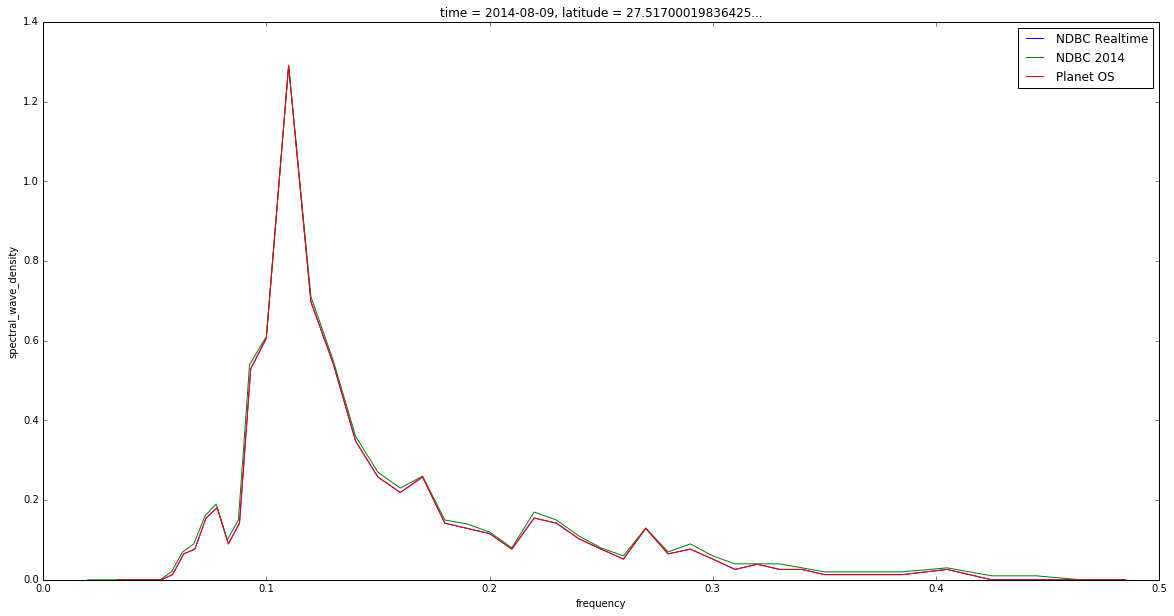

In [11]:
plt.figure(figsize=(20,10))
ds_ndbc_rt_hour.spectral_wave_density.plot(label='NDBC Realtime')
ds_ndbc_2014_hour.spectral_wave_density.plot(label='NDBC 2014')
ds_planetos_hour.spectral_wave_density.plot(label='Planet OS')
plt.legend()
plt.show()

There is a very slight discrepancy between the 2014 NDBC product and the Planet OS product, but no difference between the realtime NDBC product and Planet OS product.

## Wave Spectrum Plots

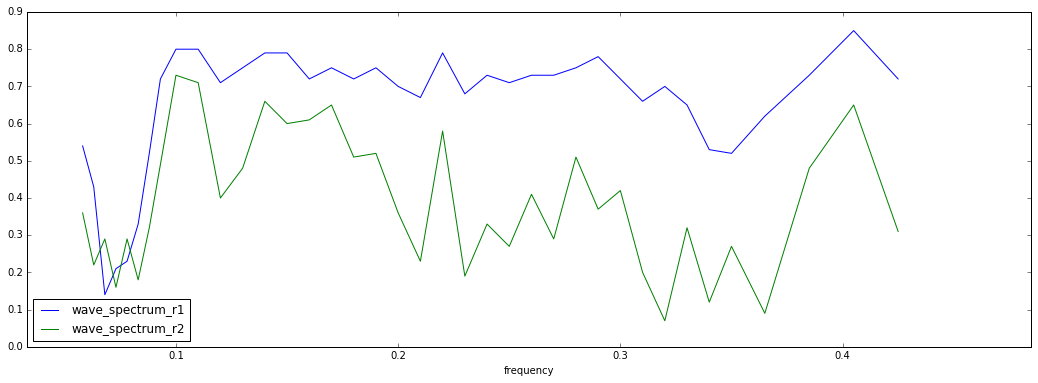

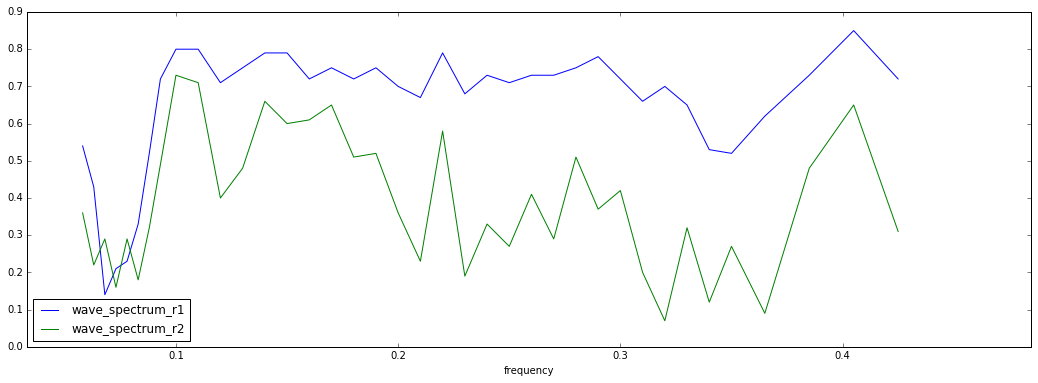

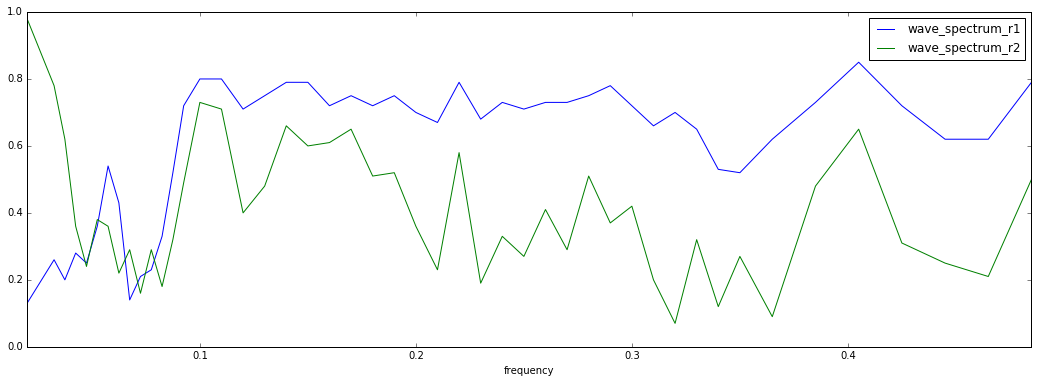

In [12]:
vars = ['wave_spectrum_r1','wave_spectrum_r2']
df_planetos.loc[:,vars].plot(label="Planet OS", figsize=(18,6))
df_ndbc_rt.loc[:,vars].plot(label="NDBC Realtime", figsize=(18,6))
df_ndbc_2014.loc[:,vars].plot(label="NDBC 2014", figsize=(18,6))
plt.show()

## Wave Direction Plots

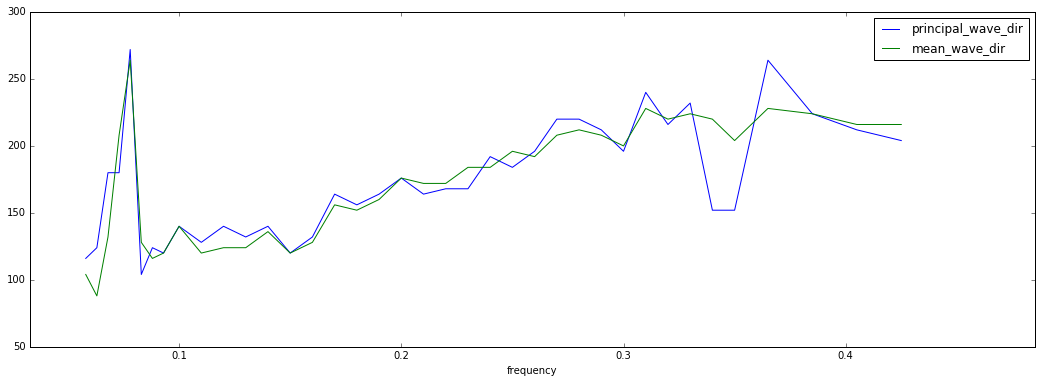

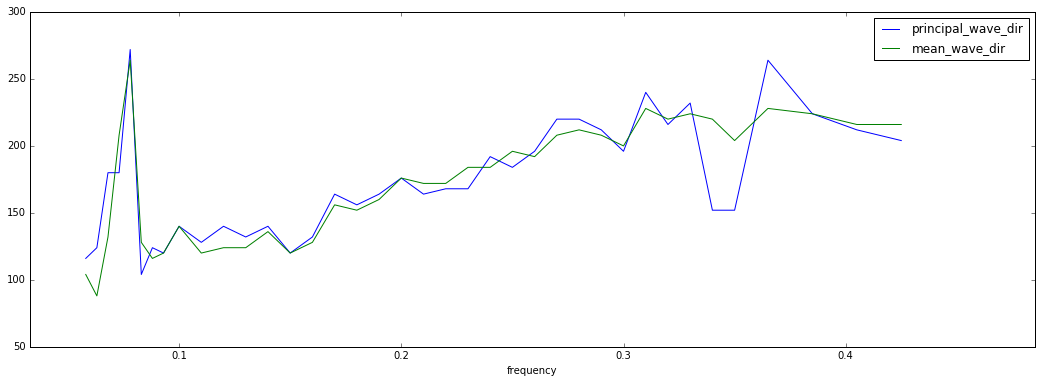

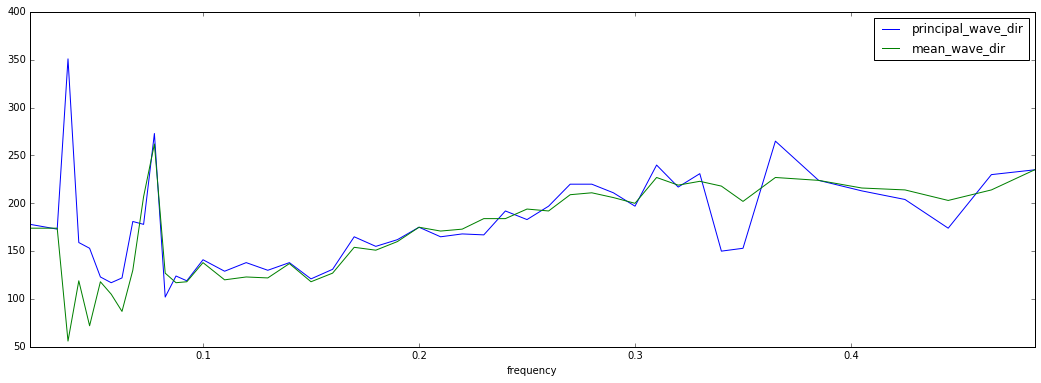

In [13]:
vars = ['principal_wave_dir','mean_wave_dir']
df_planetos.loc[:,vars].plot(label="Planet OS", figsize=(18,6))
df_ndbc_rt.loc[:,vars].plot(label="NDBC Realtime", figsize=(18,6))
df_ndbc_2014.loc[:,vars].plot(label="NDBC 2014", figsize=(18,6))
plt.show()

## Conclusion

The Planet OS [NDBC spectral wave density data product](http://data.planetos.com/datasets/noaa_ndbc_swden_stations) matches the original NDBC realtime source.

It appears that NDBC is performing addition QA/QC processing on the archival data, which differ slightly from the realtime data, however attempts to locate documentation on the historical data product processing have not been successful.

Planet OS does not currently overwrite historical data with the NDBC archival products, however we may consider doing so if product quality is superior for end users.